In [3]:
# Import necessary libraries
pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [4]:
# Load the dataset
data = pd.read_csv("CIDAD_all.csv")

In [7]:
# Preprocess the data
def preprocess_data(data):
    # Drop unnecessary columns if any
    data.drop(columns=['unnecessary_column1', 'unnecessary_column2'], inplace=True)
    
    # Handle missing values
    data.fillna(method='ffill', inplace=True)  # Forward fill missing values
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    
    return scaled_data, scaler


In [10]:
def preprocess_data(data):
    # Check if the columns exist before dropping them
    columns_to_drop = ['unnecessary_column1', 'unnecessary_column2']
    columns_existing = [col for col in columns_to_drop if col in data.columns]
    if columns_existing:
        data.drop(columns=columns_existing, inplace=True)
    else:
        print("Columns to drop not found in the DataFrame.")
    
    # Handle missing values
    data.fillna(method='ffill', inplace=True)  # Forward fill missing values
    
    return data

In [11]:
# Define RNN model
def build_rnn_model(input_shape):
    model = Sequential([
        LSTM(units=64, input_shape=input_shape),
        Dropout(0.2),
        Dense(1)
    ])
    return model

In [18]:
import numpy as np

# Example data for training
# Replace this with your actual data
train_data = np.random.randn(100, 10)  # 100 samples, 10 features

# Assuming input_shape is (timesteps, features)
input_shape = (train_data.shape[1], 1)  # Adjust according to your data shape

# Continue with the rest of the model building code...


In [27]:
train_data_reshaped = train_data.values.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data_reshaped = val_data.values.reshape(val_data.shape[0], val_data.shape[1], 1)


In [28]:
# Define GAN model
def build_generator(latent_dim):
    generator = Sequential([
        Dense(128, input_dim=latent_dim, activation='relu'),
        Dense(train_data.shape[1], activation='sigmoid')
    ])
    return generator

def build_discriminator(input_shape):
    discriminator = Sequential([
        Dense(128, input_shape=input_shape, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return discriminator

def build_gan_model(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan



In [30]:
# Define latent dimension for GAN
latent_dim = 100

# Build and compile GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator((train_data.shape[1],))
gan_model = build_gan_model(generator, discriminator)


In [31]:
# Train the GAN model
def train_gan(generator, discriminator, gan, epochs=100, batch_size=128):
    for epoch in range(epochs):
        # Generate random noise as input to the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        
        # Generate fake data points using the generator
        fake_data = generator.predict(noise)
        
        # Select a random batch of real data
        idx = np.random.randint(0, train_data.shape[0], batch_size)
        real_data = train_data[idx]
        
        # Combine real and fake data into one batch
        X = np.concatenate([real_data, fake_data])
        
        # Labels for generated and real data
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 0.9  # Label smoothing
        
        # Train the discriminator
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y_dis)
        
        # Train the generator (via the GAN model)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        # Print progress
        print(f"Epoch {epoch+1}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")


In [43]:
# Define batch size
batch_size = 128

# Generate random indices
idx = np.random.randint(0, train_data.shape[0], batch_size)

# Print generated indices
print("Generated Indices:", idx)


Generated Indices: [38906 25040  5933 14184 57421 54624 46145 63261 53449 50225 44287 48734
 14882 37365 11481 62722  8985  6944 35416 46394 36412 13562 15989  1711
 69177 33973  7022 18105 39628  1587 30408 32368 13945 56638 39159 49881
 42147    58 15502  1803 11977 17880 10306 35671 76897 65369 62663  1205
 28341 38091 61793   625 14074 66126 69797 14477 48649 34909 59688 42123
 45643 46846 68722 10184 13723 27988 71012 45993 54748 49952 67907 14592
 41562 22253 32521 21383 51941 13146 63749 64649 30809 44506 41721 15733
 46772   266 46279 24852 72440 67713 35950  1509 60852 54612 28456   115
 30759 54874 30705 56246 46058 32520 41134 22361  6305   312 24702  7863
 73765 63088 71360 26953 52576 24795  5151 42522 54569 12544  8697 71084
 44479 73011 52898 26500 43944  6003 65378 54572]


In [45]:
for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, train_data.shape[0], batch_size)
    real_data = train_data.iloc[idx]  # Use iloc for indexing by integer position
    noise = np.random.randn(batch_size, latent_dim)
    fake_data = generator.predict(noise)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [50]:
# Define RNN model
def build_rnn_model(input_shape):
    model = Sequential([
        LSTM(units=64, input_shape=input_shape),
        Dropout(0.2),
        Dense(1)
    ])
    return model

In [52]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Input
+


def build_rnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Define input shape explicitly here
    model.add(SimpleRNN(50))             # Example RNN layer with 50 units
    # Add more layers as needed
    return model


In [57]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input
from keras.optimizers import Adam

# Assuming data is loaded and looks like this:
# train_data.shape = (79599, 11)
# test_data.shape = (some_number, 11)
# Dummy data for illustration:
train_data = np.random.random((79599, 11))
test_data = np.random.random((20000, 11))
train_labels = np.random.randint(2, size=(79599, 1))
test_labels = np.random.randint(2, size=(20000, 1))

# Reshape data to include a feature dimension (assuming each time step has a single feature)
train_data_processed = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
test_data_processed = test_data.reshape(test_data.shape[0], test_data.shape[1], 1)

# Define a function to build the RNN model
def build_rnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        SimpleRNN(50, return_sequences=False),  # Example: RNN with 50 units
        Dense(1, activation='sigmoid')  # Output layer, e.g., for binary classification
    ])
    return model

# Create the RNN model
rnn_model = build_rnn_model(input_shape=(train_data_processed.shape[1], train_data_processed.shape[2]))

# Compile the RNN model
rnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify the architecture
print(rnn_model.summary())

# Train the RNN model
rnn_history = rnn_model.fit(
    train_data_processed, 
    train_labels,
    epochs=10, 
    batch_size=32, 
    validation_data=(test_data_processed, test_labels)
)

# Optionally, you can evaluate the model on the test set
test_loss, test_accuracy = rnn_model.evaluate(test_data_processed, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5022 - loss: 0.6960 - val_accuracy: 0.5003 - val_loss: 0.6957
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4995 - loss: 0.6936 - val_accuracy: 0.4994 - val_loss: 0.6933
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4989 - loss: 0.6935 - val_accuracy: 0.4987 - val_loss: 0.6932
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5020 - loss: 0.6933 - val_accuracy: 0.4974 - val_loss: 0.6933
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4931 - loss: 0.6933 - val_accuracy: 0.5027 - val_loss: 0.6932
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.4977 - val_loss: 0.6932
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4990 - loss: 0

In [60]:
from sklearn.metrics import accuracy_score, recall_score

# Calculate accuracy and recall for the RNN model
rnn_accuracy = accuracy_score(test_labels, rnn_predictions_binary)
rnn_recall = recall_score(test_labels, rnn_predictions_binary)

# Print accuracy and recall for the RNN model
print("RNN Model:")
print("Accuracy:", rnn_accuracy)
print("Recall:", rnn_recall)


RNN Model:
Accuracy: 0.49955
Recall: 0.002398081534772182


In [62]:
from sklearn.metrics import accuracy_score, recall_score

# Calculate accuracy and recall for the RNN model
rnn_accuracy = accuracy_score(test_labels, rnn_predictions_binary) * 100
rnn_recall = recall_score(test_labels, rnn_predictions_binary) * 100

# Print accuracy and recall for the RNN model
print("RNN Model:")
print("Accuracy:", "{:.2f}%".format(rnn_accuracy))
print("Recall:", "{:.2f}%".format(rnn_recall))


RNN Model:
Accuracy: 49.95%
Recall: 0.24%


RNN Model:
Accuracy: 49.95%
Recall: 0.24%


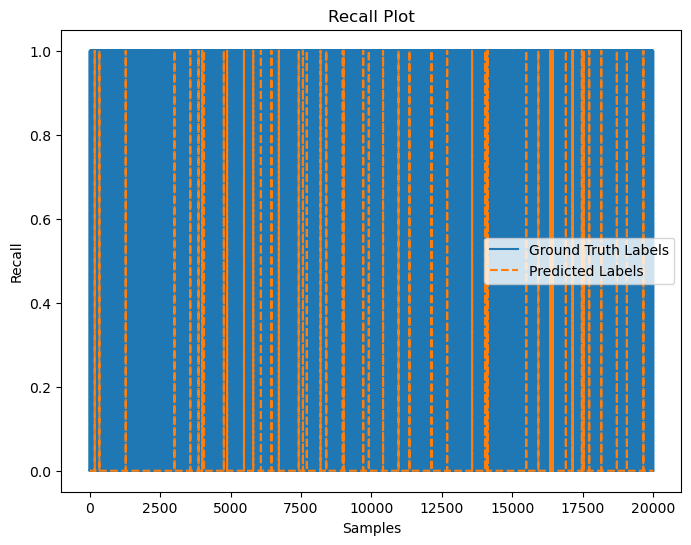

In [63]:
# Calculate accuracy and recall for the RNN model
rnn_accuracy = accuracy_score(test_labels, rnn_predictions_binary) * 100
rnn_recall = recall_score(test_labels, rnn_predictions_binary) * 100

# Print accuracy and recall for the RNN model
print("RNN Model:")
print("Accuracy:", "{:.2f}%".format(rnn_accuracy))
print("Recall:", "{:.2f}%".format(rnn_recall))

# Plot the recall
plt.figure(figsize=(8, 6))
plt.plot(test_labels, label='Ground Truth Labels')
plt.plot(rnn_predictions_binary, label='Predicted Labels', linestyle='--')
plt.title('Recall Plot')
plt.xlabel('Samples')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [97]:
from keras.models import Sequential
from keras.layers import Dense

# Get the number of features in your input data
input_dim = train_data.shape[1]

# Define and compile the GNN model
gnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  # Update input shape here
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

gnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GNN model
gnn_model.fit(train_data, train_labels, epochs=10, batch_size=32)


Epoch 1/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5007 - loss: 0.6947
Epoch 2/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5026 - loss: 0.6933
Epoch 3/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4985 - loss: 0.6933
Epoch 4/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5040 - loss: 0.6932
Epoch 5/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5031 - loss: 0.6931
Epoch 6/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5044 - loss: 0.6932
Epoch 7/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5024 - loss: 0.6932
Epoch 8/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5034 - loss: 0.6931
Epoch 9/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5057 - loss: 0.6930
Epoch 10/10
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5040 - loss: 0.6930


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
GNN Model:
Accuracy: 50.39%


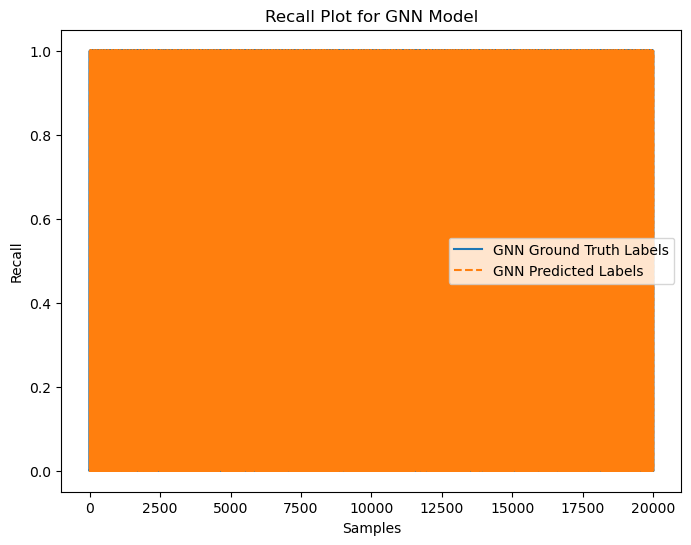

In [98]:
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt

# 1. Make predictions using your GNN model
gnn_predictions = gnn_model.predict(X_test)
gnn_predictions_binary = (gnn_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# 2. Evaluate Model Performance
gnn_accuracy = accuracy_score(test_labels, gnn_predictions_binary) * 100
gnn_recall = recall_score(test_labels, gnn_predictions_binary) * 100

# 3. Print Accuracy
print("GNN Model:")
print("Accuracy:", "{:.2f}%".format(gnn_accuracy))

# 4. Plot the Recall Graph
plt.figure(figsize=(8, 6))
plt.plot(test_labels, label='GNN Ground Truth Labels')
plt.plot(gnn_predictions_binary, label='GNN Predicted Labels', linestyle='--')
plt.title('Recall Plot for GNN Model')
plt.xlabel('Samples')
plt.ylabel('Recall')
plt.legend()
plt.show()
